In [9]:
import numpy as np
import numpy.linalg as la
float_formatter = lambda x: "%.3f" % x
import matplotlib.pyplot as plt
from utils import *
import PIL
import math
%matplotlib inline

In [13]:
# Генерация квадратной матрицы размером 150x150
mat_size = 300
mat = np.random.rand(mat_size, mat_size)

# Выполнение сингулярного разложения
U, s, VT = la.svd(mat)

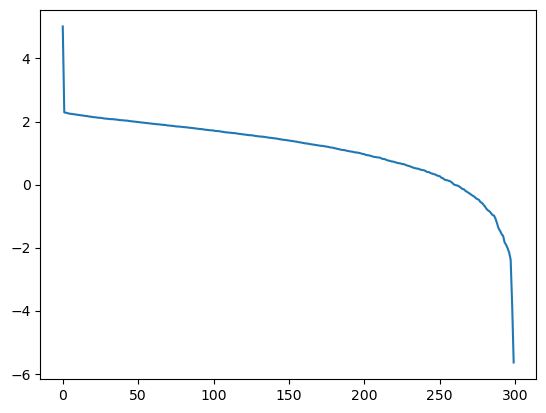

In [14]:
plt.plot(np.log(s))

$\tilde{A} = U[:,:r] S[:r] V^{\top} [:r, :] $

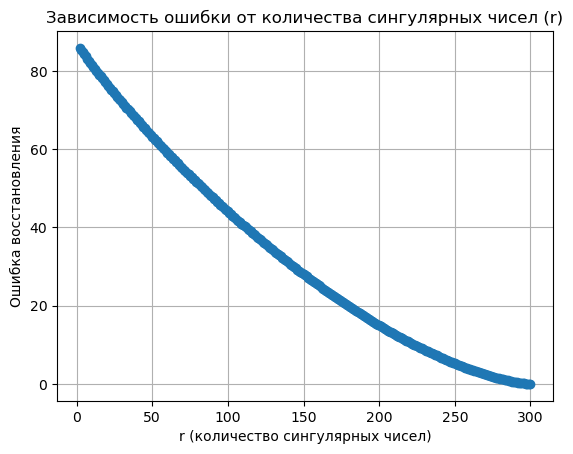

In [15]:
# Создание диагональной матрицы Sigma
Sigma = np.diag(s)

# Инициализация списков для сохранения значений r и error_approx
r_values = list(range(2, mat_size + 1))
errors = []

# Перебор различных значений r
for r in r_values:
    # Восстановление матрицы с использованием r сингулярных чисел
    mat_approx = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]
    error_approx = 0
    
    # Вычисление ошибки
    for i in range(mat_size):
        for j in range(mat_size):
            error_approx += pow((mat[i, j] - mat_approx[i, j]),2)
    error_approx = math.sqrt(error_approx)
    errors.append(error_approx)
    
# Построение графика
plt.plot(r_values, errors, marker='o')
plt.title('Зависимость ошибки от количества сингулярных чисел (r)')
plt.xlabel('r (количество сингулярных чисел)')
plt.ylabel('Ошибка восстановления')
plt.grid(True)
plt.show()